In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os

# import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from wordcloud import WordCloud

## Data Analysis

In [2]:
box = pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-1/boxes.csv')
box

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96
...,...,...,...,...,...,...
285,286,Standard,Home Delivery - Digital Payment,0.0,4.0,15.96
286,287,Standard,Home Delivery - Digital Payment,0.0,2.9,15.96
287,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96
288,289,Standard,Home Delivery - Digital Payment,0.0,4.7,15.96


In [3]:
prb1 = pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-1/problem 1.csv')
prb1

,MAGIC_KEY
0,28D5BB06356
1,293BEAB4E98
2,2962EE8065C
3,2957BE29EA9
4,28E351A0745
...,...
58684,28FB7C09776
58685,28E0E3B69BF
58686,28D343103A7
58687,290B1D6D5CB


In [4]:
purchase = pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-1/purchase.csv')
purchase

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0
...,...,...,...,...
2455859,28/10/2018,2BD992B5538,12.0,1.0
2455860,28/10/2018,2C97CD72233,17.0,1.0
2455861,28/10/2018,2C91C61D372,40.0,1.0
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0


In [5]:
print(purchase.BOX_ID.nunique())
purchase.MAGIC_KEY.nunique()

291


1274108

In [6]:
purchase.MAGIC_KEY.nunique()/len(purchase)

0.5188023441037451

In [7]:
sub = pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-1/sample submission 1.csv')
sub

,MAGIC_KEY,PURCHASE
0,28D5BB06356,Y
1,293BEAB4E98,Y
2,2962EE8065C,Y
3,2957BE29EA9,Y
4,28E351A0745,Y
...,...,...
58684,28FB7C09776,Y
58685,28E0E3B69BF,Y
58686,28D343103A7,Y
58687,290B1D6D5CB,Y


In [8]:
box.rename(columns=lambda x: x.lower(), inplace=True)
purchase.rename(columns=lambda x: x.lower(), inplace=True)

In [9]:
print(box.sample())
print()
print(purchase.sample())

    box_id  quality      delivery_option  milk  meat  unit_price
17      18  Premium  Home Delivery - CoD  10.0   2.7       12.98

       purchase_date    magic_key  box_id  box_count
983760     24/1/2019  2C7512FEFFA   119.0        1.0


In [10]:
purchase.isna().sum()
purchase.dropna(inplace=True)

In [11]:
print(box.shape)
print()
print(purchase.shape)

(290, 6)

(2455817, 4)


<Axes: xlabel='delivery_option'>

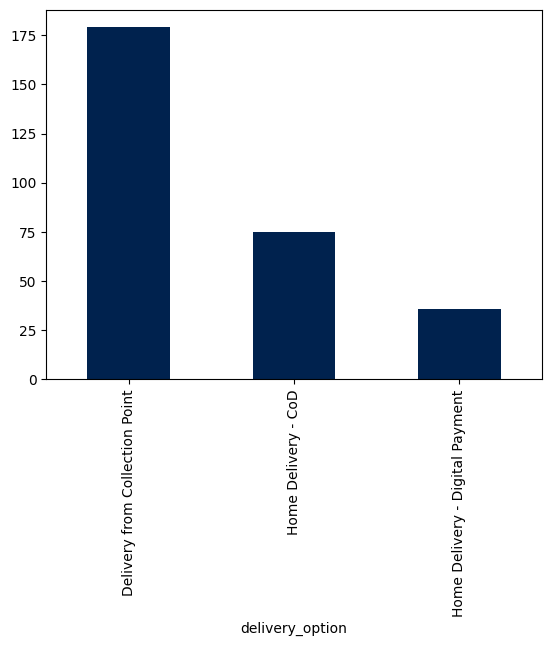

In [12]:
box.delivery_option.value_counts().plot(kind='bar', cmap='cividis')

In [13]:
print(box.dtypes)
print()
print(purchase.dtypes)

box_id               int64
quality             object
delivery_option     object
milk               float64
meat               float64
unit_price         float64
dtype: object

purchase_date     object
magic_key         object
box_id           float64
box_count        float64
dtype: object


In [14]:
purchase['box_id'] = purchase['box_id'].astype(int)

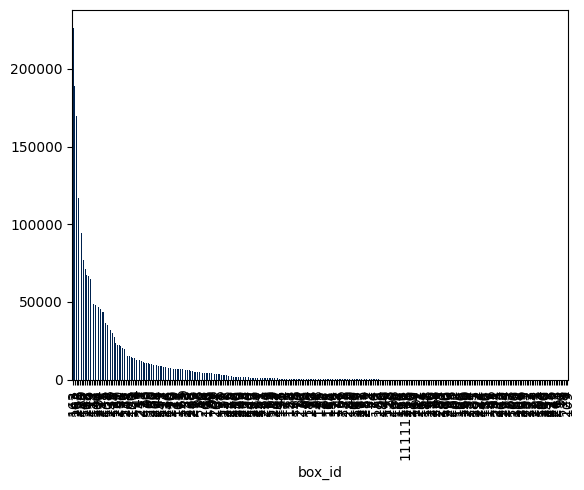

In [15]:
purchase.box_id.value_counts().plot(kind='bar', cmap='cividis');

In [16]:
merged_df = pd.merge(box, purchase, on='box_id', how='left')

In [17]:
merged_df

,box_id,quality,delivery_option,milk,meat,unit_price,purchase_date,magic_key,box_count
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96,4/2/2019,2C88D36D1FC,1.0
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2/1/2019,2BF011BDB38,1.0
2,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2/1/2019,2CA0EE8F2B3,1.0
3,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2/1/2019,2C623730B09,1.0
4,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2/1/2019,2CA6CE1054F,1.0
...,...,...,...,...,...,...,...,...,...
2455795,289,Standard,Home Delivery - Digital Payment,0.0,4.7,15.96,18/2/2019,29149CE828C,1.0
2455796,290,Standard,Home Delivery - Digital Payment,12.0,1.8,19.98,20/2/2019,28FF7857D43,1.0
2455797,290,Standard,Home Delivery - Digital Payment,12.0,1.8,19.98,5/1/2019,28F675D813E,1.0
2455798,290,Standard,Home Delivery - Digital Payment,12.0,1.8,19.98,11/1/2019,29D99F43873,1.0


In [18]:
print(box.head(1))
print()
print(purchase.head(1))

   box_id  quality      delivery_option  milk  meat  unit_price
0       1  Premium  Home Delivery - CoD   0.0   2.7        9.96

  purchase_date    magic_key  box_id  box_count
0      1/2/2019  2CED678A247      12        1.0


In [19]:
filt = merged_df[merged_df['box_id'] == 12]
filt

,box_id,quality,delivery_option,milk,meat,unit_price,purchase_date,magic_key,box_count
71380,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,1/2/2019,2CED678A247,1.0
71381,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,1/2/2019,2BF58D91BA1,1.0
71382,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,1/2/2019,2C3A3F7DB65,1.0
71383,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,1/2/2019,2BD2641961A,1.0
71384,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,1/2/2019,2BD2EAA1C90,1.0
...,...,...,...,...,...,...,...,...,...
79627,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,28/10/2018,2BCA02D99F8,1.0
79628,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,28/10/2018,2BFA4F45A15,1.0
79629,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,28/10/2018,2BE60E8E91E,1.0
79630,12,Premium,Home Delivery - CoD,8.0,1.5,12.98,28/10/2018,2BE0FCC2107,1.0


In [20]:
filt = box[box['box_id'] == 12]
filt

,box_id,quality,delivery_option,milk,meat,unit_price
11,12,Premium,Home Delivery - CoD,8.0,1.5,12.98


In [21]:
merged_df.nunique()

box_id                 290
quality                  2
delivery_option          3
milk                    28
meat                    39
unit_price              18
purchase_date          151
magic_key          1274087
box_count               13
dtype: int64

In [22]:
merged_df.magic_key.value_counts()

magic_key
2CC2011C2DF    40
28D251217BD    38
2BFCB915234    36
29D9005EBAD    35
29F30296E7B    35
               ..
2C21BCBA33B     1
2C788AA3F8C     1
2C77781D4F9     1
2CCC8C8F510     1
28F675D813E     1
Name: count, Length: 1274087, dtype: int64

In [23]:
filt = merged_df[merged_df['magic_key'] == '28D5BB06356']
filt

,box_id,quality,delivery_option,milk,meat,unit_price,purchase_date,magic_key,box_count
2080886,248,Standard,Delivery from Collection Point,0.0,2.9,13.96,26/2/2019,28D5BB06356,1.0
2152257,255,Standard,Delivery from Collection Point,0.0,3.6,15.96,27/1/2019,28D5BB06356,1.0
2172020,255,Standard,Delivery from Collection Point,0.0,3.6,15.96,23/12/2018,28D5BB06356,1.0


In [24]:
xli = merged_df['purchase_date'].tolist()

mxli = [d[2:] for d in xli]

mxli[:5]

['2/2019', '1/2019', '1/2019', '1/2019', '1/2019']

In [25]:
# merged_df['moy'] = mxli

# merged_df.moy.value_counts()

In [26]:
# merged_df.moy.value_counts().plot(kind='bar');
# merged_df.drop(['moy'], axis=1,inplace=True)

## Lets Submit

In [27]:
cli = prb1['MAGIC_KEY'].tolist()

cli[:4]

['28D5BB06356', '293BEAB4E98', '2962EE8065C', '2957BE29EA9']

In [28]:
fmerged = merged_df[merged_df['magic_key'].isin(cli)].copy()

fmerged

,box_id,quality,delivery_option,milk,meat,unit_price,purchase_date,magic_key,box_count
32388,8,Premium,Home Delivery - CoD,10.0,0.0,12.18,4/2/2019,24D82067E0B,1.0
32404,8,Premium,Home Delivery - CoD,10.0,0.0,12.18,4/2/2019,24D82068D27,1.0
34989,8,Premium,Home Delivery - CoD,10.0,0.0,12.18,4/1/2019,24D82067E0B,1.0
35041,8,Premium,Home Delivery - CoD,10.0,0.0,12.18,4/1/2019,24D82068D27,1.0
35306,8,Premium,Home Delivery - CoD,10.0,0.0,12.18,5/1/2019,24B595AB7CF,1.0
...,...,...,...,...,...,...,...,...,...
2455786,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,19/1/2019,28E5FB5E7BF,1.0
2455787,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,28/1/2019,28E10E2FEDE,1.0
2455788,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,14/12/2018,28E10E2FEDE,1.0
2455789,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,15/12/2018,28D9691954A,1.0


In [29]:
merged_df.shape, fmerged.shape

((2455800, 9), (218602, 9))

In [30]:
fmerged.quality.value_counts()

quality
Standard    218224
Premium        378
Name: count, dtype: int64

In [31]:
fmerged['nquality'] = fmerged['quality'].astype('category').cat.codes
fmerged['ndelivery'] = fmerged['delivery_option'].astype('category').cat.codes

category_mapping = dict(enumerate(fmerged['quality'].astype('category').cat.categories))
category_mapping2 = dict(enumerate(fmerged['delivery_option'].astype('category').cat.categories))

print(category_mapping)

print(category_mapping2)

{0: 'Premium', 1: 'Standard'}
{0: 'Delivery from Collection Point', 1: 'Home Delivery - CoD', 2: 'Home Delivery - Digital Payment'}


In [32]:
fmerged.drop(['quality', 'delivery_option','box_id'], axis=1,inplace=True)

In [33]:
fmerged.reset_index(drop=True, inplace=True)
fmerged.head(2)

,milk,meat,unit_price,purchase_date,magic_key,box_count,nquality,ndelivery
0,10.0,0.0,12.18,4/2/2019,24D82067E0B,1.0,0,1
1,10.0,0.0,12.18,4/2/2019,24D82068D27,1.0,0,1


In [34]:
fmerged['purchase_date'] = pd.to_datetime(fmerged['purchase_date'], format='%d/%m/%Y')

fmerged['day'] = fmerged['purchase_date'].dt.day

fmerged.head(2)

,milk,meat,unit_price,purchase_date,magic_key,box_count,nquality,ndelivery,day
0,10.0,0.0,12.18,2019-02-04,24D82067E0B,1.0,0,1,4
1,10.0,0.0,12.18,2019-02-04,24D82068D27,1.0,0,1,4


In [35]:
exception = False

In [36]:
rli = []
for i in tqdm(range(len(cli))):
    temp = fmerged[fmerged['magic_key'] == cli[i]]['day'].tolist()
#     print(temp)
    if len(temp) >= 3:
        if(np.mean(temp)) <= 15:
            rli.append('Y')
        else:
            rli.append('N')  
    else:
        exception = True
        rli.append('N')
#     print(np.mean(temp))

print(exception)

100%|██████████| 58689/58689 [52:07<00:00, 18.76it/s]

True


In [37]:
rli[:5]

['N', 'Y', 'N', 'N', 'N']

In [38]:
# # Group by 'magic_key' and calculate mean of 'day_of_purchase' for each group
# avg_day_of_purchase = fmerged.groupby('magic_key')['day'].mean()

# # Check if the average day of purchase is greater than 15
# rli = ['Y' if avg <= 15 else 'N' for avg in avg_day_of_purchase]

print(rli[:10])

['N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N']


In [39]:
# avg_day_of_purchase_sorted = avg_day_of_purchase.sort_values()

# # Display the sorted Series
# print(avg_day_of_purchase_sorted)

In [40]:
# avg_day_of_purchase.describe()

In [41]:
len(rli)

58689

## create submission

In [42]:
prb1.head(5)

,MAGIC_KEY
0,28D5BB06356
1,293BEAB4E98
2,2962EE8065C
3,2957BE29EA9
4,28E351A0745


In [43]:
sub.columns

Index(['MAGIC_KEY', 'PURCHASE'], dtype='object')

In [44]:
submission = pd.DataFrame({'MAGIC_KEY': cli, 'PURCHASE': rli})

In [45]:
submission

,MAGIC_KEY,PURCHASE
0,28D5BB06356,N
1,293BEAB4E98,Y
2,2962EE8065C,N
3,2957BE29EA9,N
4,28E351A0745,N
...,...,...
58684,28FB7C09776,N
58685,28E0E3B69BF,N
58686,28D343103A7,N
58687,290B1D6D5CB,N


In [46]:
submission.to_csv('submission.csv', index=False)